In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import csv
import pandas as pd
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True

blues = cm.get_cmap(plt.get_cmap('Blues'))
greens = cm.get_cmap(plt.get_cmap('Greens'))
reds = cm.get_cmap(plt.get_cmap('Reds'))
oranges = cm.get_cmap(plt.get_cmap('Oranges'))
purples = cm.get_cmap(plt.get_cmap('Purples'))

#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

# Single Core Task

In [2]:
singleCorePython = pd.DataFrame.from_csv('stragglers/tidy_data/SingleCore_104675.csv')
singleCoreCpp = pd.DataFrame.from_csv('stragglers/tidy_data/timings_104675.csv')

In [3]:
histSingleCorePython,edgesSingleCorePython = np.histogram(singleCorePython['Compute'].values,bins=100)
histSingleCoreCpp,edgesSingleCoreCpp = np.histogram((singleCoreCpp/1000000.0)['Execute'].values,bins=100)

histSingleCorePython = histSingleCorePython/len(singleCorePython['Compute'].values)
widthSingleCorePython = 0.9 * (edgesSingleCorePython[1] - edgesSingleCorePython[0])
centerSingleCorePython = (edgesSingleCorePython[:-1] + edgesSingleCorePython[1:]) / 2

histSingleCoreCpp = histSingleCoreCpp/len(singleCoreCpp['Execute'].values)
widthSingleCoreCpp = 0.9 * (edgesSingleCoreCpp[1] - edgesSingleCoreCpp[0])
centerSingleCoreCpp = (edgesSingleCoreCpp[:-1] + edgesSingleCoreCpp[1:]) / 2

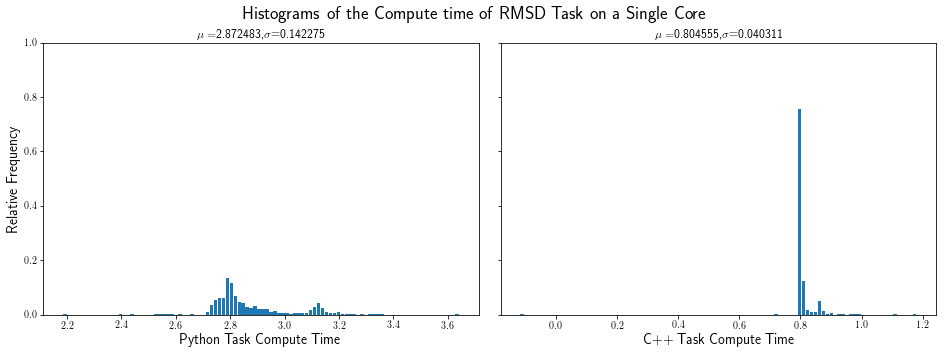

In [28]:
fig,axes = plt.subplots(nrows=1,ncols=2, sharex=False,sharey=True,figsize=[16,5],gridspec_kw={'wspace':0.05, 'hspace':0.05})
axes[0].bar(centerSingleCorePython, histSingleCorePython, align='center', width=widthSingleCorePython)
axes[1].bar(centerSingleCoreCpp, histSingleCoreCpp, align='center', width=widthSingleCoreCpp)
fig.suptitle('Histograms of the Compute time of RMSD Task on a Single Core',fontsize=18)
axes[0].set_title('$\mu=$%f,$\sigma$=%f'%(singleCorePython['Compute'].mean(),singleCorePython['Compute'].std()),fontsize=12)
axes[1].set_title('$\mu=$%f,$\sigma$=%f'%((singleCoreCpp/1000000.0)['Execute'].mean(),(singleCoreCpp/1000000.0)['Execute'].std()),fontsize=12)
axes[0].set_xlabel('Python Task Compute Time', fontsize=14)
axes[1].set_xlabel('C++ Task Compute Time',fontsize=14)
axes[0].set_ylim([0,1])
axes[0].set_ylabel('Relative Frequency',fontsize=14)

# Parallel Execution with different frameworks

In [5]:
comet_mpi4py = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/comet_mpi4py_NoIO.csv')
comet_mpicpp = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/comet_mpic++_NoIO.csv')
comet_dask   = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/comet_dask_NoIO.csv')
comet_spark   = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/comet_spark_NoIO.csv')

In [6]:
comet_mpi4py1 = comet_mpi4py[comet_mpi4py['Nodes']==1].drop(['Framework','Nodes'],axis=1)
comet_mpi4py2 = comet_mpi4py[comet_mpi4py['Nodes']==2].drop(['Framework','Nodes'],axis=1)
comet_mpi4py3 = comet_mpi4py[comet_mpi4py['Nodes']==3].drop(['Framework','Nodes'],axis=1)

comet_mpicpp1 = comet_mpicpp[comet_mpicpp['Nodes']==1].drop(['Framework','Nodes'],axis=1)
comet_mpicpp2 = comet_mpicpp[comet_mpicpp['Nodes']==2].drop(['Framework','Nodes'],axis=1)
comet_mpicpp3 = comet_mpicpp[comet_mpicpp['Nodes']==3].drop(['Framework','Nodes'],axis=1)

comet_dask1 = comet_dask[comet_dask['Nodes']==1].drop(['Framework','Nodes'],axis=1)
comet_dask2 = comet_dask[comet_dask['Nodes']==2].drop(['Framework','Nodes'],axis=1)
comet_dask3 = comet_dask[comet_dask['Nodes']==3].drop(['Framework','Nodes'],axis=1)

comet_spark1 = comet_spark[comet_spark['Nodes']==1].drop(['Framework','Nodes'],axis=1)
comet_spark2 = comet_spark[comet_spark['Nodes']==2].drop(['Framework','Nodes'],axis=1)
comet_spark3 = comet_spark[comet_spark['Nodes']==3].drop(['Framework','Nodes'],axis=1)

In [7]:
Cmpi4pyS = [((comet_mpi4py1>(comet_mpi4py1.mean()+3*comet_mpi4py1.std()))==True).sum().values[0]/len(comet_mpi4py1),
            ((comet_mpi4py2>(comet_mpi4py2.mean()+3*comet_mpi4py2.std()))==True).sum().values[0]/len(comet_mpi4py2),
            ((comet_mpi4py3>(comet_mpi4py3.mean()+3*comet_mpi4py3.std()))==True).sum().values[0]/len(comet_mpi4py3)]

CmpicppS = [((comet_mpicpp1>(comet_mpicpp1.mean()+3*comet_mpicpp1.std()))==True).sum().values[0]/len(comet_mpicpp1),
            ((comet_mpicpp2>(comet_mpicpp2.mean()+3*comet_mpicpp2.std()))==True).sum().values[0]/len(comet_mpicpp2),
            ((comet_mpicpp3>(comet_mpicpp3.mean()+3*comet_mpicpp3.std()))==True).sum().values[0]/len(comet_mpicpp3)]

CdaskS   = [((comet_dask1>(comet_dask1.mean()+3*comet_dask1.std()))==True).sum().values[0]/len(comet_dask1),
            ((comet_dask2>(comet_dask2.mean()+3*comet_dask2.std()))==True).sum().values[0]/len(comet_dask2),
            ((comet_dask3>(comet_dask3.mean()+3*comet_dask3.std()))==True).sum().values[0]/len(comet_dask3)]

CsparkS  = [((comet_spark1>(comet_spark1.mean()+3*comet_spark1.std()))==True).sum().values[0]/len(comet_spark1),
            ((comet_spark2>(comet_spark2.mean()+3*comet_spark2.std()))==True).sum().values[0]/len(comet_spark2),
            ((comet_spark3>(comet_spark3.mean()+3*comet_spark3.std()))==True).sum().values[0]/len(comet_spark3)]

In [8]:
wrangler_mpi4py = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/wrangler_mpi4py_NoIO.csv')
wrangler_mpicpp = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/wrangler_mpic++_NoIO.csv')
wrangler_dask   = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/wrangler_dask_NoIO.csv')
wrangler_spark  = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/wrangler_spark_NoIO.csv')
#wrangler_rp     = pd.DataFrame.from_csv('stragglers/tidy_data/wrangler_rp_NoIO.csv')

In [9]:
wrangler_mpi4py1 = wrangler_mpi4py[wrangler_mpi4py['Nodes']==1].drop(['Framework','Nodes'],axis=1)
wrangler_mpi4py2 = wrangler_mpi4py[wrangler_mpi4py['Nodes']==2].drop(['Framework','Nodes'],axis=1)
wrangler_mpi4py3 = wrangler_mpi4py[wrangler_mpi4py['Nodes']==3].drop(['Framework','Nodes'],axis=1)

wrangler_mpicpp1 = wrangler_mpicpp[wrangler_mpicpp['Nodes']==1].drop(['Framework','Nodes'],axis=1)
wrangler_mpicpp2 = wrangler_mpicpp[wrangler_mpicpp['Nodes']==2].drop(['Framework','Nodes'],axis=1)
wrangler_mpicpp3 = wrangler_mpicpp[wrangler_mpicpp['Nodes']==3].drop(['Framework','Nodes'],axis=1)

wrangler_dask1 = wrangler_dask[wrangler_dask['Nodes']==1].drop(['Framework','Nodes'],axis=1)
wrangler_dask2 = wrangler_dask[wrangler_dask['Nodes']==2].drop(['Framework','Nodes'],axis=1)
wrangler_dask3 = wrangler_dask[wrangler_dask['Nodes']==3].drop(['Framework','Nodes'],axis=1)

wrangler_spark1 = wrangler_spark[wrangler_spark['Nodes']==1].drop(['Framework','Nodes'],axis=1)
wrangler_spark2 = wrangler_spark[wrangler_spark['Nodes']==2].drop(['Framework','Nodes'],axis=1)
wrangler_spark3 = wrangler_spark[wrangler_spark['Nodes']==3].drop(['Framework','Nodes'],axis=1)

#wrangler_rp1 = wrangler_rp[wrangler_rp['Nodes']==1].drop(['Framework','Nodes'],axis=1)
#wrangler_rp2 = wrangler_rp[wrangler_rp['Nodes']==2].drop(['Framework','Nodes'],axis=1)
#wrangler_rp3 = wrangler_rp[wrangler_rp['Nodes']==3].drop(['Framework','Nodes'],axis=1)

In [10]:
Wmpi4pyS = [((wrangler_mpi4py1>(wrangler_mpi4py1.mean()+3*wrangler_mpi4py1.std()))==True).sum().values[0]/len(wrangler_mpi4py1),
            ((wrangler_mpi4py2>(wrangler_mpi4py2.mean()+3*wrangler_mpi4py2.std()))==True).sum().values[0]/len(wrangler_mpi4py2),
            ((wrangler_mpi4py3>(wrangler_mpi4py3.mean()+3*wrangler_mpi4py3.std()))==True).sum().values[0]/len(wrangler_mpi4py3)]

WmpicppS = [((wrangler_mpicpp1>(wrangler_mpicpp1.mean()+3*wrangler_mpicpp1.std()))==True).sum().values[0]/len(wrangler_mpicpp1),
            ((wrangler_mpicpp2>(wrangler_mpicpp2.mean()+3*wrangler_mpicpp2.std()))==True).sum().values[0]/len(wrangler_mpicpp2),
            ((wrangler_mpicpp3>(wrangler_mpicpp3.mean()+3*wrangler_mpicpp3.std()))==True).sum().values[0]/len(wrangler_mpicpp3)]

WdaskS   = [((wrangler_dask1>(wrangler_dask1.mean()+3*wrangler_dask1.std()))==True).sum().values[0]/len(wrangler_dask1),
            ((wrangler_dask2>(wrangler_dask2.mean()+3*wrangler_dask2.std()))==True).sum().values[0]/len(wrangler_dask2),
            ((wrangler_dask3>(wrangler_dask3.mean()+3*wrangler_dask3.std()))==True).sum().values[0]/len(wrangler_dask3)]

WsparkS  = [((wrangler_spark1>(wrangler_spark1.mean()+3*wrangler_spark1.std()))==True).sum().values[0]/len(wrangler_spark1),
            ((wrangler_spark2>(wrangler_spark2.mean()+3*wrangler_spark2.std()))==True).sum().values[0]/len(wrangler_spark2),
            ((wrangler_spark3>(wrangler_spark3.mean()+3*wrangler_spark3.std()))==True).sum().values[0]/len(wrangler_spark3)]

#WrpS     = [((wrangler_rp1>(wrangler_rp1.mean()+3*wrangler_rp1.std()))==True).sum().values[0]/len(wrangler_rp1),
#            ((wrangler_rp2>(wrangler_rp2.mean()+3*wrangler_rp2.std()))==True).sum().values[0]/len(wrangler_rp2),
#            ((wrangler_rp3>(wrangler_rp3.mean()+3*wrangler_rp3.std()))==True).sum().values[0]/len(wrangler_rp3)]

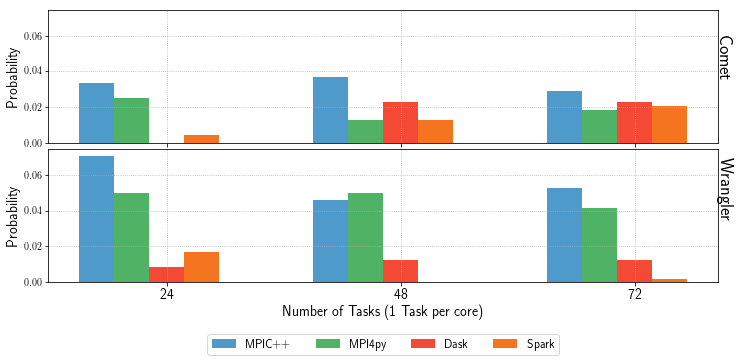

In [11]:
fig,axes = plt.subplots(nrows=2,ncols=1, sharex=True,sharey=True,figsize=[12,5],gridspec_kw={'wspace':0.05, 'hspace':0.05})
x = np.arange(3)
width = 0.15
axes[0].bar(x-2*width,CmpicppS,color=blues(150),width=width,label='MPIC++')
axes[0].bar(x-width,Cmpi4pyS,color=greens(150),width=width,label='MPI4py')
axes[0].bar(x+0*width,CdaskS,color=reds(150),width=width,label='Dask')
axes[0].bar(x+1*width,CsparkS,color=oranges(150),width=width,label='Spark')

axes[1].bar(x-2*width,WmpicppS,color=blues(150),width=width,label='MPIC++')
axes[1].bar(x-width,Wmpi4pyS,color=greens(150),width=width,label='MPI4py')
axes[1].bar(x+0*width,WdaskS,color=reds(150),width=width,label='Dask')
axes[1].bar(x+1*width,WsparkS,color=oranges(150),width=width,label='Spark')
#axes[1].bar(x+2*width,WrpS,color=purples(150),width=width,label='RADICAL-Pilot')
axes[0].grid('on',which='both',linestyle=':')
axes[1].grid('on',which='both',linestyle=':')
axes[1].set_xlabel('Number of Tasks (1 Task per core)',fontsize=14)
axes[1].set_xticks([0,1,2])
axes[1].set_xticklabels(['24','48','72'],fontsize=14)
axes[0].set_ylabel('Probability',fontsize=14)
axes[1].set_ylabel('Probability',fontsize=14)
axes[0].text(2.35,0.06, 'Comet',fontsize=18,bbox={'facecolor':'grey', 'alpha':0, 'pad':8},horizontalalignment='left',verticalalignment='top',rotation=270)
axes[1].text(2.35,.07, 'Wrangler',fontsize=18,bbox={'facecolor':'grey', 'alpha':0, 'pad':8},horizontalalignment='left',verticalalignment='top',rotation=270)
axes[1].legend(['MPIC++','MPI4py','Dask','Spark','RADICAL-Pilot'],fontsize=12,bbox_to_anchor=(0., -.55, 1,0), loc='lower center',ncol=5, borderaxespad=0.)
#fig.savefig('straggler_prob_NoIO.pdf',dpi=800,bbox_inches='tight',pad_inches=0)

In [12]:
histCometMpiCPP1,edgesCometMpiCPP1 = np.histogram((comet_mpicpp1/1000000.0)['Duration'].values,bins=20)
histCometMpiCPP2,edgesCometMpiCPP2 = np.histogram((comet_mpicpp2/1000000.0)['Duration'].values,bins=40)
histCometMpiCPP3,edgesCometMpiCPP3 = np.histogram((comet_mpicpp3/1000000.0)['Duration'].values,bins=60)

histCometMpiCPP1 = histCometMpiCPP1/len((comet_mpicpp1/1000000.0)['Duration'].values)
widthCometMpiCPP1 = 0.9 * (edgesCometMpiCPP1[1] - edgesCometMpiCPP1[0])
centerCometMpiCPP1 = (edgesCometMpiCPP1[:-1] + edgesCometMpiCPP1[1:]) / 2

histCometMpiCPP2 = histCometMpiCPP2/len((comet_mpicpp2/1000000.0)['Duration'].values)
widthCometMpiCPP2 = 0.9 * (edgesCometMpiCPP2[1] - edgesCometMpiCPP2[0])
centerCometMpiCPP2 = (edgesCometMpiCPP2[:-1] + edgesCometMpiCPP2[1:]) / 2

histCometMpiCPP3 = histCometMpiCPP3/len((comet_mpicpp3/1000000.0)['Duration'].values)
widthCometMpiCPP3 = 0.9 * (edgesCometMpiCPP3[1] - edgesCometMpiCPP3[0])
centerCometMpiCPP3 = (edgesCometMpiCPP3[:-1] + edgesCometMpiCPP3[1:]) / 2

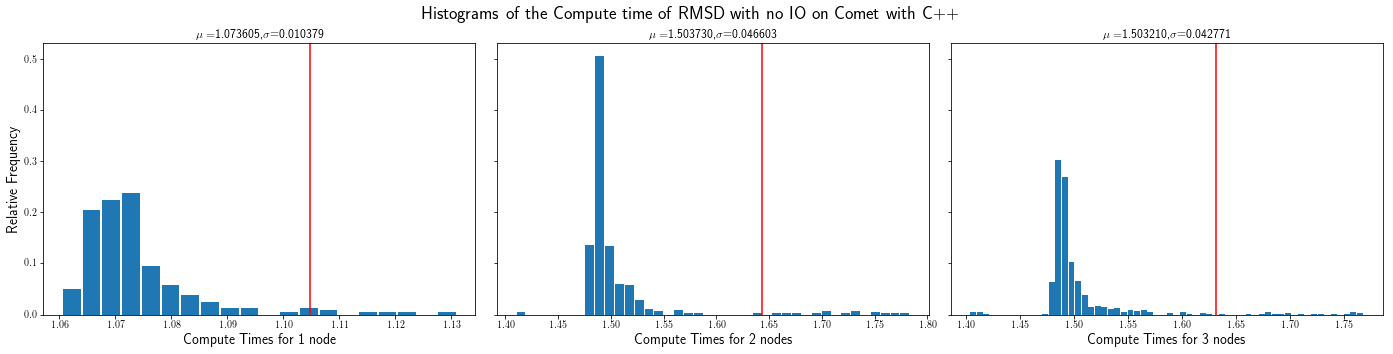

In [13]:
fig,axes = plt.subplots(nrows=1,ncols=3, sharex=False,sharey=True,figsize=[24,5],gridspec_kw={'wspace':0.05, 'hspace':0.05})
axes[0].bar(centerCometMpiCPP1, histCometMpiCPP1, align='center', width=widthCometMpiCPP1)
axes[1].bar(centerCometMpiCPP2, histCometMpiCPP2, align='center', width=widthCometMpiCPP2)
axes[2].bar(centerCometMpiCPP3, histCometMpiCPP3, align='center', width=widthCometMpiCPP3)
fig.suptitle('Histograms of the Compute time of RMSD with no IO on Comet with C++',fontsize=18)
axes[0].set_title('$\mu=$%f,$\sigma$=%f'%((comet_mpicpp1/1000000.0)['Duration'].mean(),(comet_mpicpp1/1000000.0)['Duration'].std()),fontsize=12)
axes[1].set_title('$\mu=$%f,$\sigma$=%f'%((comet_mpicpp2/1000000.0)['Duration'].mean(),(comet_mpicpp2/1000000.0)['Duration'].std()),fontsize=12)
axes[2].set_title('$\mu=$%f,$\sigma$=%f'%((comet_mpicpp3/1000000.0)['Duration'].mean(),(comet_mpicpp3/1000000.0)['Duration'].std()),fontsize=12)
axes[0].set_xlabel('Compute Times for 1 node', fontsize=14)
axes[1].set_xlabel('Compute Times for 2 nodes',fontsize=14)
axes[2].set_xlabel('Compute Times for 3 nodes',fontsize=14)
#axes[0].set_ylim([0,0.5])
axes[0].axvline(x=((comet_mpicpp1/1000000.0)['Duration'].mean()+3*(comet_mpicpp1/1000000.0)['Duration'].std()),color='red')
axes[1].axvline(x=((comet_mpicpp2/1000000.0)['Duration'].mean()+3*(comet_mpicpp2/1000000.0)['Duration'].std()),color='red')
axes[2].axvline(x=((comet_mpicpp3/1000000.0)['Duration'].mean()+3*(comet_mpicpp3/1000000.0)['Duration'].std()),color='red')
axes[0].set_ylabel('Relative Frequency',fontsize=14)

In [14]:
histWranglerMpiCPP1,edgesWranglerMpiCPP1 = np.histogram((wrangler_mpicpp1/1000000.0)['Duration'].values,bins=40)
histWranglerMpiCPP2,edgesWranglerMpiCPP2 = np.histogram((wrangler_mpicpp2/1000000.0)['Duration'].values,bins=80)
histWranglerMpiCPP3,edgesWranglerMpiCPP3 = np.histogram((wrangler_mpicpp3/1000000.0)['Duration'].values,bins=120)

histWranglerMpiCPP1 = histWranglerMpiCPP1/len((wrangler_mpicpp1/1000000.0)['Duration'].values)
widthWranglerMpiCPP1 = 0.9 * (edgesWranglerMpiCPP1[1] - edgesWranglerMpiCPP1[0])
centerWranglerMpiCPP1 = (edgesWranglerMpiCPP1[:-1] + edgesWranglerMpiCPP1[1:]) / 2

histWranglerMpiCPP2 = histWranglerMpiCPP2/len((wrangler_mpicpp2/1000000.0)['Duration'].values)
widthWranglerMpiCPP2 = 0.9 * (edgesWranglerMpiCPP2[1] - edgesWranglerMpiCPP2[0])
centerWranglerMpiCPP2 = (edgesWranglerMpiCPP2[:-1] + edgesWranglerMpiCPP2[1:]) / 2

histWranglerMpiCPP3 = histWranglerMpiCPP3/len((wrangler_mpicpp3/1000000.0)['Duration'].values)
widthWranglerMpiCPP3 = 0.9 * (edgesWranglerMpiCPP3[1] - edgesWranglerMpiCPP3[0])
centerWranglerMpiCPP3 = (edgesWranglerMpiCPP3[:-1] + edgesWranglerMpiCPP3[1:]) / 2

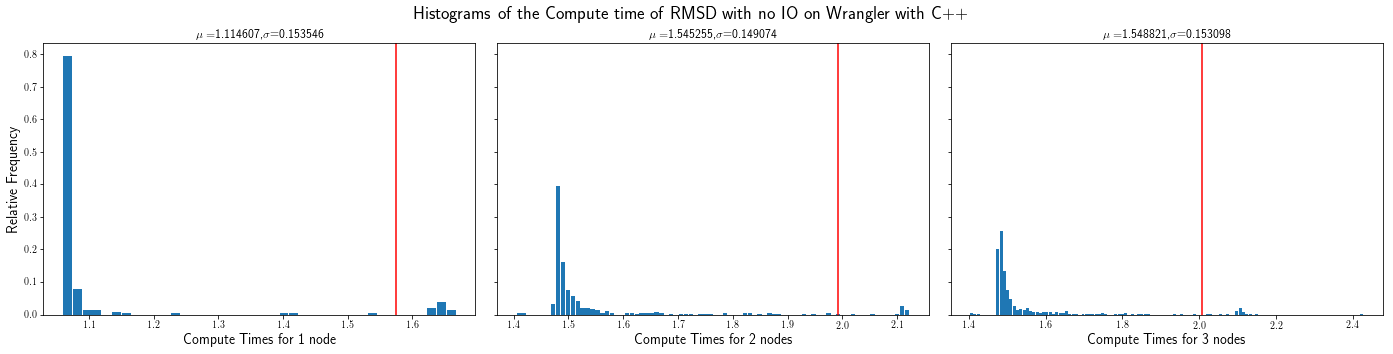

In [15]:
fig,axes = plt.subplots(nrows=1,ncols=3, sharex=False,sharey=True,figsize=[24,5],gridspec_kw={'wspace':0.05, 'hspace':0.05})
axes[0].bar(centerWranglerMpiCPP1, histWranglerMpiCPP1, align='center', width=widthWranglerMpiCPP1)
axes[1].bar(centerWranglerMpiCPP2, histWranglerMpiCPP2, align='center', width=widthWranglerMpiCPP2)
axes[2].bar(centerWranglerMpiCPP3, histWranglerMpiCPP3, align='center', width=widthWranglerMpiCPP3)
fig.suptitle('Histograms of the Compute time of RMSD with no IO on Wrangler with C++',fontsize=18)
axes[0].set_title('$\mu=$%f,$\sigma$=%f'%((wrangler_mpicpp1/1000000.0)['Duration'].mean(),(wrangler_mpicpp1/1000000.0)['Duration'].std()),fontsize=12)
axes[1].set_title('$\mu=$%f,$\sigma$=%f'%((wrangler_mpicpp2/1000000.0)['Duration'].mean(),(wrangler_mpicpp2/1000000.0)['Duration'].std()),fontsize=12)
axes[2].set_title('$\mu=$%f,$\sigma$=%f'%((wrangler_mpicpp3/1000000.0)['Duration'].mean(),(wrangler_mpicpp3/1000000.0)['Duration'].std()),fontsize=12)
axes[0].set_xlabel('Compute Times for 1 node', fontsize=14)
axes[1].set_xlabel('Compute Times for 2 nodes',fontsize=14)
axes[2].set_xlabel('Compute Times for 3 nodes',fontsize=14)
axes[0].set_ylabel('Relative Frequency',fontsize=14)
axes[0].axvline(x=((wrangler_mpicpp1/1000000.0)['Duration'].mean()+3*(wrangler_mpicpp1/1000000.0)['Duration'].std()),color='red')
axes[1].axvline(x=((wrangler_mpicpp2/1000000.0)['Duration'].mean()+3*(wrangler_mpicpp2/1000000.0)['Duration'].std()),color='red')
axes[2].axvline(x=((wrangler_mpicpp3/1000000.0)['Duration'].mean()+3*(wrangler_mpicpp3/1000000.0)['Duration'].std()),color='red')

In [16]:
histCometMpi4py1,edgesCometMpi4py1 = np.histogram((comet_mpi4py1)['Duration'].values,bins=40)
histCometMpi4py2,edgesCometMpi4py2 = np.histogram((comet_mpi4py2)['Duration'].values,bins=80)
histCometMpi4py3,edgesCometMpi4py3 = np.histogram((comet_mpi4py3)['Duration'].values,bins=120)

histCometMpi4py1 = histCometMpi4py1/len((comet_mpi4py1)['Duration'].values)
widthCometMpi4py1 = 0.9 * (edgesCometMpi4py1[1] - edgesCometMpi4py1[0])
centerCometMpi4py1 = (edgesCometMpi4py1[:-1] + edgesCometMpi4py1[1:]) / 2

histCometMpi4py2 = histCometMpi4py2/len((comet_mpi4py2)['Duration'].values)
widthCometMpi4py2 = 0.9 * (edgesCometMpi4py2[1] - edgesCometMpi4py2[0])
centerCometMpi4py2 = (edgesCometMpi4py2[:-1] + edgesCometMpi4py2[1:]) / 2

histCometMpi4py3 = histCometMpi4py3/len((comet_mpi4py3)['Duration'].values)
widthCometMpi4py3 = 0.9 * (edgesCometMpi4py3[1] - edgesCometMpi4py3[0])
centerCometMpi4py3 = (edgesCometMpi4py3[:-1] + edgesCometMpi4py3[1:]) / 2

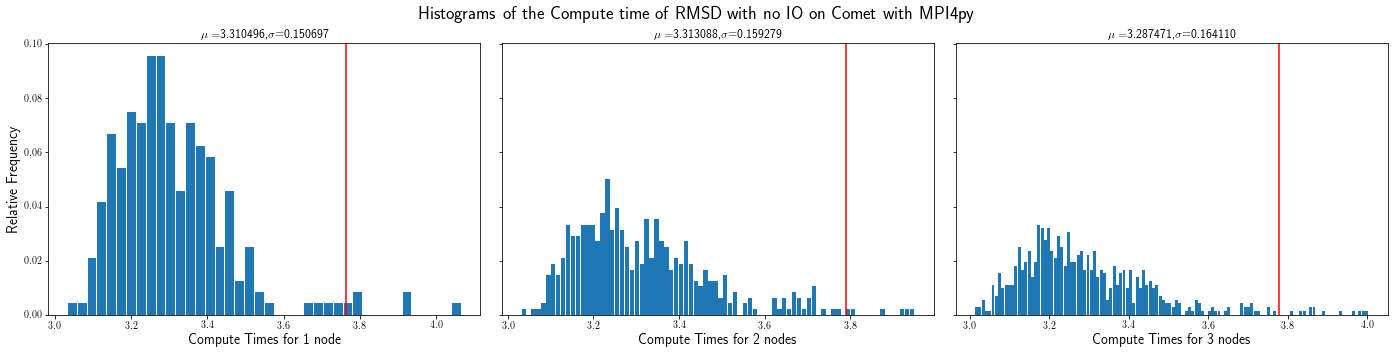

In [17]:
fig,axes = plt.subplots(nrows=1,ncols=3, sharex=False,sharey=True,figsize=[24,5],gridspec_kw={'wspace':0.05, 'hspace':0.05})
axes[0].bar(centerCometMpi4py1, histCometMpi4py1, align='center', width=widthCometMpi4py1)
axes[1].bar(centerCometMpi4py2, histCometMpi4py2, align='center', width=widthCometMpi4py2)
axes[2].bar(centerCometMpi4py3, histCometMpi4py3, align='center', width=widthCometMpi4py3)
fig.suptitle('Histograms of the Compute time of RMSD with no IO on Comet with MPI4py',fontsize=18)
axes[0].set_title('$\mu=$%f,$\sigma$=%f'%((comet_mpi4py1/1.0)['Duration'].mean(),(comet_mpi4py1/1.0)['Duration'].std()),fontsize=12)
axes[1].set_title('$\mu=$%f,$\sigma$=%f'%((comet_mpi4py2/1.0)['Duration'].mean(),(comet_mpi4py2/1.0)['Duration'].std()),fontsize=12)
axes[2].set_title('$\mu=$%f,$\sigma$=%f'%((comet_mpi4py3/1.0)['Duration'].mean(),(comet_mpi4py3/1.0)['Duration'].std()),fontsize=12)
axes[0].set_xlabel('Compute Times for 1 node', fontsize=14)
axes[1].set_xlabel('Compute Times for 2 nodes',fontsize=14)
axes[2].set_xlabel('Compute Times for 3 nodes',fontsize=14)
axes[0].set_ylabel('Relative Frequency',fontsize=14)
axes[0].axvline(x=((comet_mpi4py1/1.0)['Duration'].mean()+3*(comet_mpi4py1/1.0)['Duration'].std()),color='red')
axes[1].axvline(x=((comet_mpi4py2/1.0)['Duration'].mean()+3*(comet_mpi4py2/1.0)['Duration'].std()),color='red')
axes[2].axvline(x=((comet_mpi4py3/1.0)['Duration'].mean()+3*(comet_mpi4py3/1.0)['Duration'].std()),color='red')

In [18]:
histWranglerMpi4py1,edgesWranglerMpi4py1 = np.histogram((wrangler_mpi4py1)['Duration'].values,bins=40)
histWranglerMpi4py2,edgesWranglerMpi4py2 = np.histogram((wrangler_mpi4py2)['Duration'].values,bins=80)
histWranglerMpi4py3,edgesWranglerMpi4py3 = np.histogram((wrangler_mpi4py3)['Duration'].values,bins=120)

histWranglerMpi4py1 = histWranglerMpi4py1/len((wrangler_mpi4py1)['Duration'].values)
widthWranglerMpi4py1 = 0.9 * (edgesWranglerMpi4py1[1] - edgesWranglerMpi4py1[0])
centerWranglerMpi4py1 = (edgesWranglerMpi4py1[:-1] + edgesWranglerMpi4py1[1:]) / 2

histWranglerMpi4py2 = histWranglerMpi4py2/len((wrangler_mpi4py2)['Duration'].values)
widthWranglerMpi4py2 = 0.9 * (edgesWranglerMpi4py2[1] - edgesWranglerMpi4py2[0])
centerWranglerMpi4py2 = (edgesWranglerMpi4py2[:-1] + edgesWranglerMpi4py2[1:]) / 2

histWranglerMpi4py3 = histWranglerMpi4py3/len((wrangler_mpi4py3)['Duration'].values)
widthWranglerMpi4py3 = 0.9 * (edgesWranglerMpi4py3[1] - edgesWranglerMpi4py3[0])
centerWranglerMpi4py3 = (edgesWranglerMpi4py3[:-1] + edgesWranglerMpi4py3[1:]) / 2

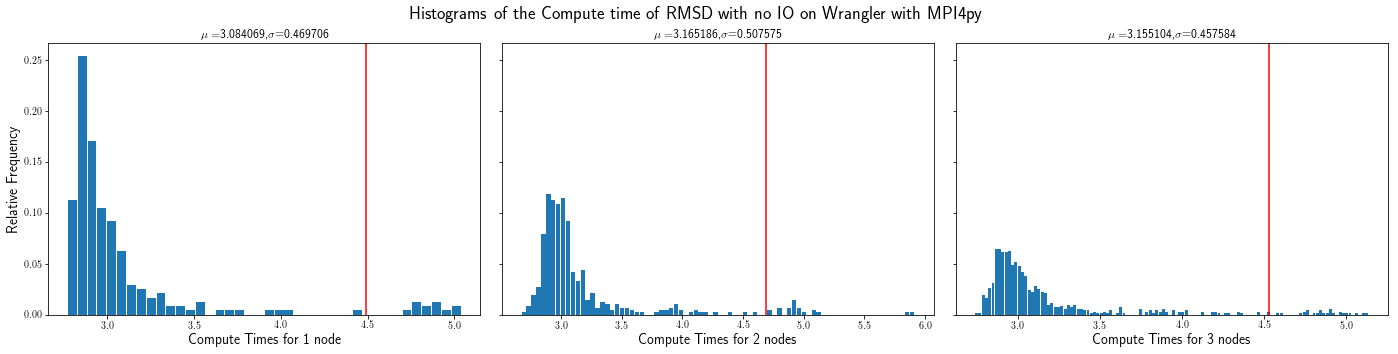

In [19]:
fig,axes = plt.subplots(nrows=1,ncols=3, sharex=False,sharey=True,figsize=[24,5],gridspec_kw={'wspace':0.05, 'hspace':0.05})
axes[0].bar(centerWranglerMpi4py1, histWranglerMpi4py1, align='center', width=widthWranglerMpi4py1)
axes[1].bar(centerWranglerMpi4py2, histWranglerMpi4py2, align='center', width=widthWranglerMpi4py2)
axes[2].bar(centerWranglerMpi4py3, histWranglerMpi4py3, align='center', width=widthWranglerMpi4py3)
fig.suptitle('Histograms of the Compute time of RMSD with no IO on Wrangler with MPI4py',fontsize=18)
axes[0].set_title('$\mu=$%f,$\sigma$=%f'%((wrangler_mpi4py1/1.0)['Duration'].mean(),(wrangler_mpi4py1/1.0)['Duration'].std()),fontsize=12)
axes[1].set_title('$\mu=$%f,$\sigma$=%f'%((wrangler_mpi4py2/1.0)['Duration'].mean(),(wrangler_mpi4py2/1.0)['Duration'].std()),fontsize=12)
axes[2].set_title('$\mu=$%f,$\sigma$=%f'%((wrangler_mpi4py3/1.0)['Duration'].mean(),(wrangler_mpi4py3/1.0)['Duration'].std()),fontsize=12)
axes[0].set_xlabel('Compute Times for 1 node', fontsize=14)
axes[1].set_xlabel('Compute Times for 2 nodes',fontsize=14)
axes[2].set_xlabel('Compute Times for 3 nodes',fontsize=14)
axes[0].set_ylabel('Relative Frequency',fontsize=14)
axes[0].axvline(x=((wrangler_mpi4py1/1.0)['Duration'].mean()+3*(wrangler_mpi4py1/1.0)['Duration'].std()),color='red')
axes[1].axvline(x=((wrangler_mpi4py2/1.0)['Duration'].mean()+3*(wrangler_mpi4py2/1.0)['Duration'].std()),color='red')
axes[2].axvline(x=((wrangler_mpi4py3/1.0)['Duration'].mean()+3*(wrangler_mpi4py3/1.0)['Duration'].std()),color='red')

In [20]:
histCometDask1,edgesCometDask1 = np.histogram((comet_dask1/1000.0)['Duration'].values,bins=40)
histCometDask2,edgesCometDask2 = np.histogram((comet_dask2/1000.0)['Duration'].values,bins=80)
histCometDask3,edgesCometDask3 = np.histogram((comet_dask3/1000.0)['Duration'].values,bins=120)

histCometDask1 = histCometDask1/len((comet_dask1)['Duration'].values)
widthCometDask1 = 0.9 * (edgesCometDask1[1] - edgesCometDask1[0])
centerCometDask1 = (edgesCometDask1[:-1] + edgesCometDask1[1:]) / 2

histCometDask2 = histCometDask2/len((comet_dask2)['Duration'].values)
widthCometDask2 = 0.9 * (edgesCometDask2[1] - edgesCometDask2[0])
centerCometDask2 = (edgesCometDask2[:-1] + edgesCometDask2[1:]) / 2

histCometDask3 = histCometDask3/len((comet_dask3)['Duration'].values)
widthCometDask3 = 0.9 * (edgesCometDask3[1] - edgesCometDask3[0])
centerCometDask3 = (edgesCometDask3[:-1] + edgesCometDask3[1:]) / 2

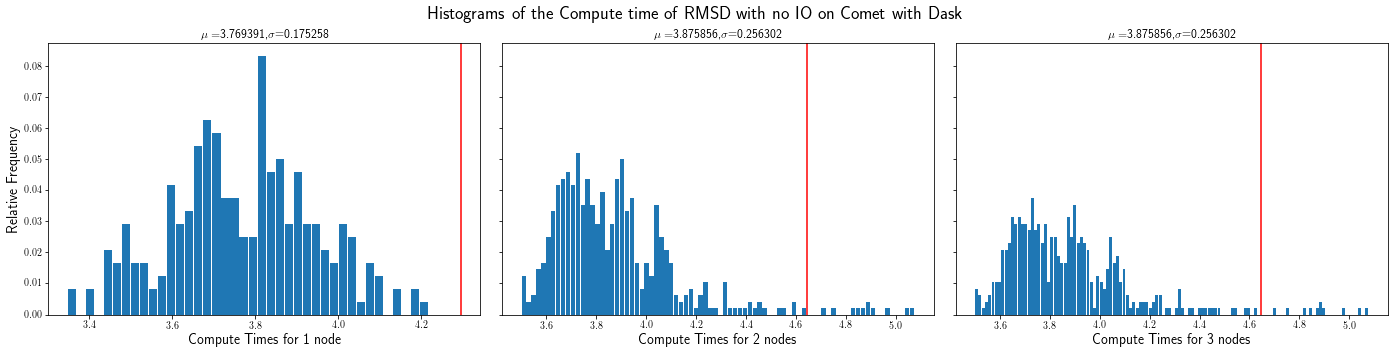

In [21]:
fig,axes = plt.subplots(nrows=1,ncols=3, sharex=False,sharey=True,figsize=[24,5],gridspec_kw={'wspace':0.05, 'hspace':0.05})
axes[0].bar(centerCometDask1, histCometDask1, align='center', width=widthCometDask1)
axes[1].bar(centerCometDask2, histCometDask2, align='center', width=widthCometDask2)
axes[2].bar(centerCometDask3, histCometDask3, align='center', width=widthCometDask3)
fig.suptitle('Histograms of the Compute time of RMSD with no IO on Comet with Dask',fontsize=18)
axes[0].set_title('$\mu=$%f,$\sigma$=%f'%((comet_dask1/1000.0)['Duration'].mean(),(comet_dask1/1000.0)['Duration'].std()),fontsize=12)
axes[1].set_title('$\mu=$%f,$\sigma$=%f'%((comet_dask2/1000.0)['Duration'].mean(),(comet_dask2/1000.0)['Duration'].std()),fontsize=12)
axes[2].set_title('$\mu=$%f,$\sigma$=%f'%((comet_dask3/1000.0)['Duration'].mean(),(comet_dask3/1000.0)['Duration'].std()),fontsize=12)
axes[0].set_xlabel('Compute Times for 1 node', fontsize=14)
axes[1].set_xlabel('Compute Times for 2 nodes',fontsize=14)
axes[2].set_xlabel('Compute Times for 3 nodes',fontsize=14)
axes[0].set_ylabel('Relative Frequency',fontsize=14)
axes[0].axvline(x=((comet_dask1/1000.0)['Duration'].mean()+3*(comet_dask1/1000.0)['Duration'].std()),color='red')
axes[1].axvline(x=((comet_dask2/1000.0)['Duration'].mean()+3*(comet_dask2/1000.0)['Duration'].std()),color='red')
axes[2].axvline(x=((comet_dask3/1000.0)['Duration'].mean()+3*(comet_dask3/1000.0)['Duration'].std()),color='red')

In [22]:
histWranglerDask1,edgesWranglerDask1 = np.histogram((wrangler_dask1/1000.0)['Duration'].values,bins=40)
histWranglerDask2,edgesWranglerDask2 = np.histogram((wrangler_dask2/1000.0)['Duration'].values,bins=80)
histWranglerDask3,edgesWranglerDask3 = np.histogram((wrangler_dask3/1000.0)['Duration'].values,bins=120)

histWranglerDask1 = histWranglerDask1/len((wrangler_dask1)['Duration'].values)
widthWranglerDask1 = 0.9 * (edgesWranglerDask1[1] - edgesWranglerDask1[0])
centerWranglerDask1 = (edgesWranglerDask1[:-1] + edgesWranglerDask1[1:]) / 2

histWranglerDask2 = histWranglerDask2/len((wrangler_dask2)['Duration'].values)
widthWranglerDask2 = 0.9 * (edgesWranglerDask2[1] - edgesWranglerDask2[0])
centerWranglerDask2 = (edgesWranglerDask2[:-1] + edgesWranglerDask2[1:]) / 2

histWranglerDask3 = histWranglerDask3/len((wrangler_dask3)['Duration'].values)
widthWranglerDask3 = 0.9 * (edgesWranglerDask3[1] - edgesWranglerDask3[0])
centerWranglerDask3 = (edgesWranglerDask3[:-1] + edgesWranglerDask3[1:]) / 2

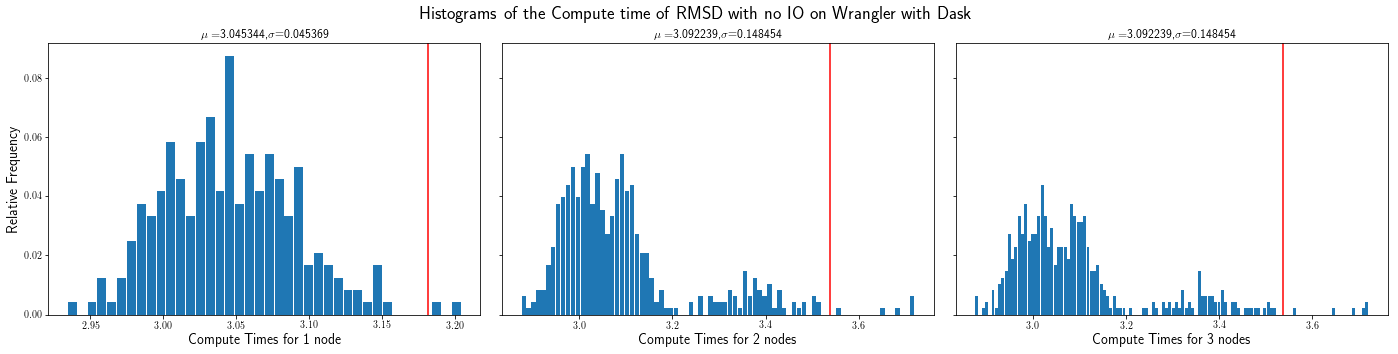

In [23]:
fig,axes = plt.subplots(nrows=1,ncols=3, sharex=False,sharey=True,figsize=[24,5],gridspec_kw={'wspace':0.05, 'hspace':0.05})
axes[0].bar(centerWranglerDask1, histWranglerDask1, align='center', width=widthWranglerDask1)
axes[1].bar(centerWranglerDask2, histWranglerDask2, align='center', width=widthWranglerDask2)
axes[2].bar(centerWranglerDask3, histWranglerDask3, align='center', width=widthWranglerDask3)
fig.suptitle('Histograms of the Compute time of RMSD with no IO on Wrangler with Dask',fontsize=18)
axes[0].set_title('$\mu=$%f,$\sigma$=%f'%((wrangler_dask1/1000.0)['Duration'].mean(),(wrangler_dask1/1000.0)['Duration'].std()),fontsize=12)
axes[1].set_title('$\mu=$%f,$\sigma$=%f'%((wrangler_dask2/1000.0)['Duration'].mean(),(wrangler_dask2/1000.0)['Duration'].std()),fontsize=12)
axes[2].set_title('$\mu=$%f,$\sigma$=%f'%((wrangler_dask3/1000.0)['Duration'].mean(),(wrangler_dask3/1000.0)['Duration'].std()),fontsize=12)
axes[0].set_xlabel('Compute Times for 1 node', fontsize=14)
axes[1].set_xlabel('Compute Times for 2 nodes',fontsize=14)
axes[2].set_xlabel('Compute Times for 3 nodes',fontsize=14)
axes[0].set_ylabel('Relative Frequency',fontsize=14)
axes[0].axvline(x=((wrangler_dask1/1000.0)['Duration'].mean()+3*(wrangler_dask1/1000.0)['Duration'].std()),color='red')
axes[1].axvline(x=((wrangler_dask2/1000.0)['Duration'].mean()+3*(wrangler_dask2/1000.0)['Duration'].std()),color='red')
axes[2].axvline(x=((wrangler_dask3/1000.0)['Duration'].mean()+3*(wrangler_dask3/1000.0)['Duration'].std()),color='red')

In [24]:
histCometSpark1,edgesCometSpark1 = np.histogram((comet_spark1/1000.0)['Duration'].values,bins=40)
histCometSpark2,edgesCometSpark2 = np.histogram((comet_spark2/1000.0)['Duration'].values,bins=80)
histCometSpark3,edgesCometSpark3 = np.histogram((comet_spark3/1000.0)['Duration'].values,bins=120)

histCometSpark1 = histCometSpark1/len((comet_spark1)['Duration'].values)
widthCometSpark1 = 0.9 * (edgesCometSpark1[1] - edgesCometSpark1[0])
centerCometSpark1 = (edgesCometSpark1[:-1] + edgesCometSpark1[1:]) / 2

histCometSpark2 = histCometSpark2/len((comet_spark2)['Duration'].values)
widthCometSpark2 = 0.9 * (edgesCometSpark2[1] - edgesCometSpark2[0])
centerCometSpark2 = (edgesCometSpark2[:-1] + edgesCometSpark2[1:]) / 2

histCometSpark3 = histCometSpark3/len((comet_spark3)['Duration'].values)
widthCometSpark3 = 0.9 * (edgesCometSpark3[1] - edgesCometSpark3[0])
centerCometSpark3 = (edgesCometSpark3[:-1] + edgesCometSpark3[1:]) / 2

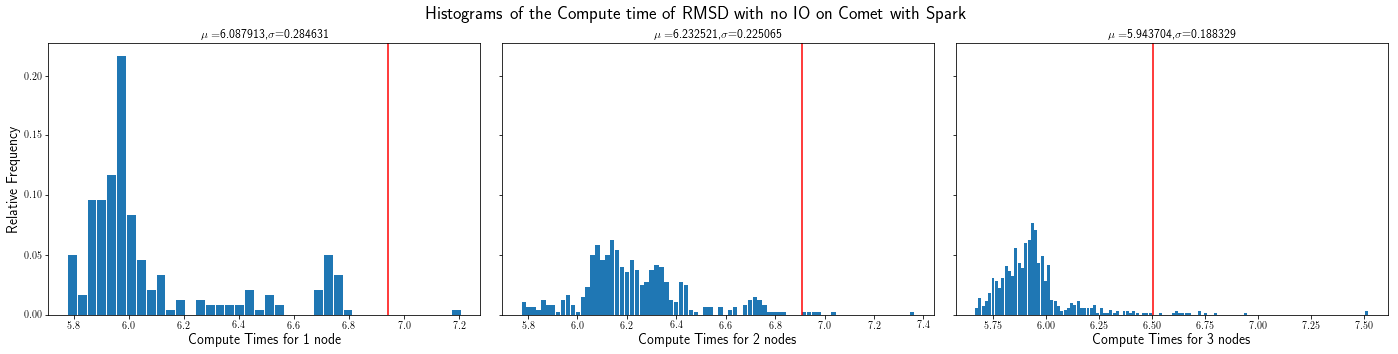

In [25]:
fig,axes = plt.subplots(nrows=1,ncols=3, sharex=False,sharey=True,figsize=[24,5],gridspec_kw={'wspace':0.05, 'hspace':0.05})
axes[0].bar(centerCometSpark1, histCometSpark1, align='center', width=widthCometSpark1)
axes[1].bar(centerCometSpark2, histCometSpark2, align='center', width=widthCometSpark2)
axes[2].bar(centerCometSpark3, histCometSpark3, align='center', width=widthCometSpark3)
fig.suptitle('Histograms of the Compute time of RMSD with no IO on Comet with Spark',fontsize=18)
axes[0].set_title('$\mu=$%f,$\sigma$=%f'%((comet_spark1/1000.0)['Duration'].mean(),(comet_spark1/1000.0)['Duration'].std()),fontsize=12)
axes[1].set_title('$\mu=$%f,$\sigma$=%f'%((comet_spark2/1000.0)['Duration'].mean(),(comet_spark2/1000.0)['Duration'].std()),fontsize=12)
axes[2].set_title('$\mu=$%f,$\sigma$=%f'%((comet_spark3/1000.0)['Duration'].mean(),(comet_spark3/1000.0)['Duration'].std()),fontsize=12)
axes[0].set_xlabel('Compute Times for 1 node', fontsize=14)
axes[1].set_xlabel('Compute Times for 2 nodes',fontsize=14)
axes[2].set_xlabel('Compute Times for 3 nodes',fontsize=14)
axes[0].set_ylabel('Relative Frequency',fontsize=14)
axes[0].axvline(x=((comet_spark1/1000.0)['Duration'].mean()+3*(comet_spark1/1000.0)['Duration'].std()),color='red')
axes[1].axvline(x=((comet_spark2/1000.0)['Duration'].mean()+3*(comet_spark2/1000.0)['Duration'].std()),color='red')
axes[2].axvline(x=((comet_spark3/1000.0)['Duration'].mean()+3*(comet_spark3/1000.0)['Duration'].std()),color='red')

In [26]:
histWranglerSpark1,edgesWranglerSpark1 = np.histogram((wrangler_spark1/1000.0)['Duration'].values,bins=40)
histWranglerSpark2,edgesWranglerSpark2 = np.histogram((wrangler_spark2/1000.0)['Duration'].values,bins=80)
histWranglerSpark3,edgesWranglerSpark3 = np.histogram((wrangler_spark3/1000.0)['Duration'].values,bins=120)

histWranglerSpark1 = histWranglerSpark1/len((wrangler_spark1)['Duration'].values)
widthWranglerSpark1 = 0.9 * (edgesWranglerSpark1[1] - edgesWranglerSpark1[0])
centerWranglerSpark1 = (edgesWranglerSpark1[:-1] + edgesWranglerSpark1[1:]) / 2

histWranglerSpark2 = histWranglerSpark2/len((wrangler_spark2)['Duration'].values)
widthWranglerSpark2 = 0.9 * (edgesWranglerSpark2[1] - edgesWranglerSpark2[0])
centerWranglerSpark2 = (edgesWranglerSpark2[:-1] + edgesWranglerSpark2[1:]) / 2

histWranglerSpark3 = histWranglerSpark3/len((wrangler_spark3)['Duration'].values)
widthWranglerSpark3 = 0.9 * (edgesWranglerSpark3[1] - edgesWranglerSpark3[0])
centerWranglerSpark3 = (edgesWranglerSpark3[:-1] + edgesWranglerSpark3[1:]) / 2

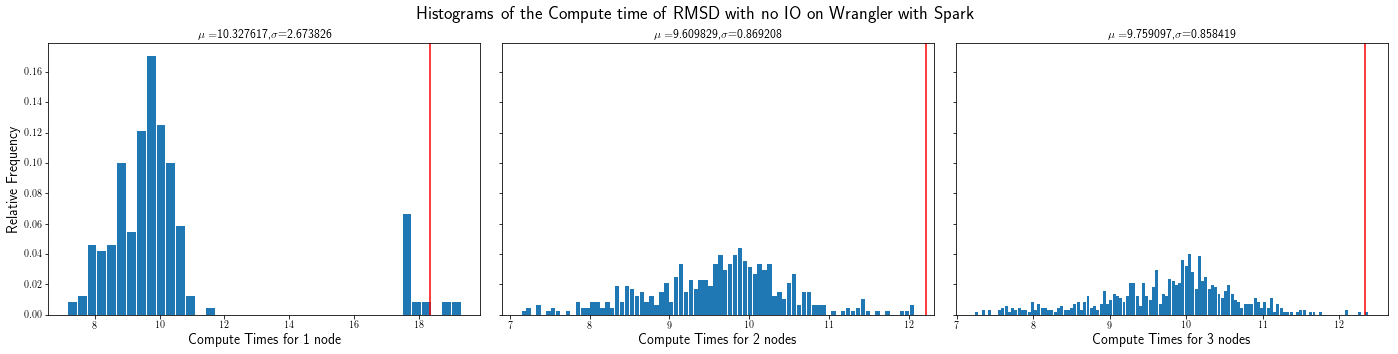

In [27]:
fig,axes = plt.subplots(nrows=1,ncols=3, sharex=False,sharey=True,figsize=[24,5],gridspec_kw={'wspace':0.05, 'hspace':0.05})
axes[0].bar(centerWranglerSpark1, histWranglerSpark1, align='center', width=widthWranglerSpark1)
axes[1].bar(centerWranglerSpark2, histWranglerSpark2, align='center', width=widthWranglerSpark2)
axes[2].bar(centerWranglerSpark3, histWranglerSpark3, align='center', width=widthWranglerSpark3)
fig.suptitle('Histograms of the Compute time of RMSD with no IO on Wrangler with Spark',fontsize=18)
axes[0].set_title('$\mu=$%f,$\sigma$=%f'%((wrangler_spark1/1000.0)['Duration'].mean(),(wrangler_spark1/1000.0)['Duration'].std()),fontsize=12)
axes[1].set_title('$\mu=$%f,$\sigma$=%f'%((wrangler_spark2/1000.0)['Duration'].mean(),(wrangler_spark2/1000.0)['Duration'].std()),fontsize=12)
axes[2].set_title('$\mu=$%f,$\sigma$=%f'%((wrangler_spark3/1000.0)['Duration'].mean(),(wrangler_spark3/1000.0)['Duration'].std()),fontsize=12)
axes[0].set_xlabel('Compute Times for 1 node', fontsize=14)
axes[1].set_xlabel('Compute Times for 2 nodes',fontsize=14)
axes[2].set_xlabel('Compute Times for 3 nodes',fontsize=14)
axes[0].set_ylabel('Relative Frequency',fontsize=14)
axes[0].axvline(x=((wrangler_spark1/1000.0)['Duration'].mean()+3*(wrangler_spark1/1000.0)['Duration'].std()),color='red')
axes[1].axvline(x=((wrangler_spark2/1000.0)['Duration'].mean()+3*(wrangler_spark2/1000.0)['Duration'].std()),color='red')
axes[2].axvline(x=((wrangler_spark3/1000.0)['Duration'].mean()+3*(wrangler_spark3/1000.0)['Duration'].std()),color='red')